<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Parkinson-Disease-Prediction/blob/main/Parkinson_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARKINSON DISEASE DETECTION**

### **Description**  
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column

![picture](https://drive.google.com/uc?export=view&id=1VCtUWVvZZH7TMohGSsvrkgC4jEBACAi7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='drive/My Drive/Dataset'

### **Importing the Essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

### **Creating DataFrame**

In [ ]:
df=pd.read_csv(path+"/parkinson.csv")
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### **Exploring the Dataset**

In [ ]:
a,b=df.shape
print('Number of Rows:    ',a)
print('Number of Columns: ',b)

Number of Rows:     195
Number of Columns:  24


name - ASCII subject name and recording number <br>
MDVP:Fo(Hz) - Average vocal fundamental frequency <br>
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency <br>
MDVP:Flo(Hz) - Minimum vocal fundamental frequency <br>
MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency<br>
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude<br>
NHR, HNR - Two measures of the ratio of noise to tonal components in the voice <br>
status - The health status of the subject (one) - Parkinson's, (zero) - healthy <br>
RPDE, D2 - Two nonlinear dynamical complexity measures<br>
DFA - Signal fractal scaling exponent<br>
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### **Null Values in the Dataset**

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### **Checking 'status'**

In [ ]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


### **Data Cleaning Function**

In [ ]:
!pip install datacleaner
!pip install fasteda

  Preparing metadata (setup.py) ... done
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7408 sha256=68d6e57527a8a8614a64f1c5dfc121d2fb1bf9bd2b7c12a9ce4656ad2ccef8b8
  Stored in directory: /root/.cache/pip/wheels/8f/bc/5b/f7ca5772f61851334a8580f3ede175b92a7122eef3464e2b3d
Successfully built datacleaner
  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=5b2479fd39613e60593f8354ba9d1b22735dbce68a8386478b07c9865c16ef46
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [ ]:
from datacleaner import autoclean
from fasteda import fast_eda

In [ ]:
df2=df.drop("status",axis=1)

In [ ]:
df2=autoclean(df2)
df2

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### **Duplicates in the Dataset**

In [ ]:
k=df2.duplicated().sum()
print('Duplicates present in the dataset are: ',k)

Duplicates present in the dataset are:  0


In [ ]:
df2=df2.drop_duplicates()
print('Duplicates present in the dataset are: ',df2.duplicated().sum())

Duplicates present in the dataset are:  0


### **Outliers in the Dataset**

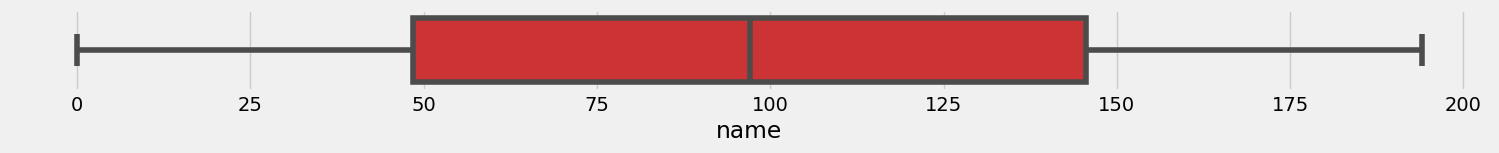

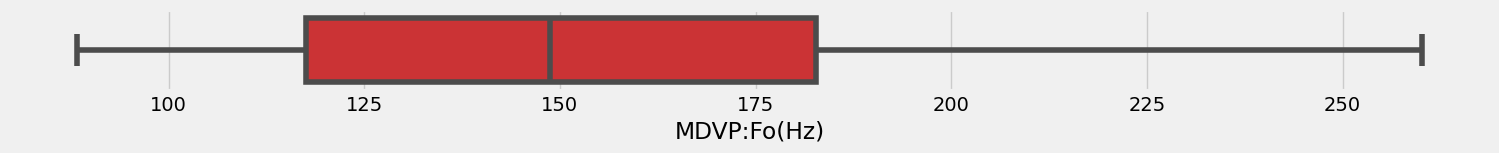

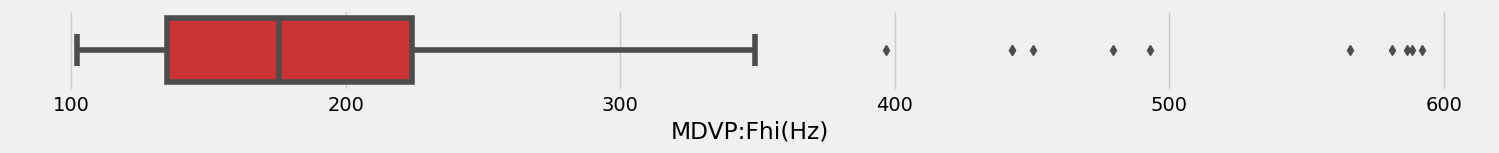

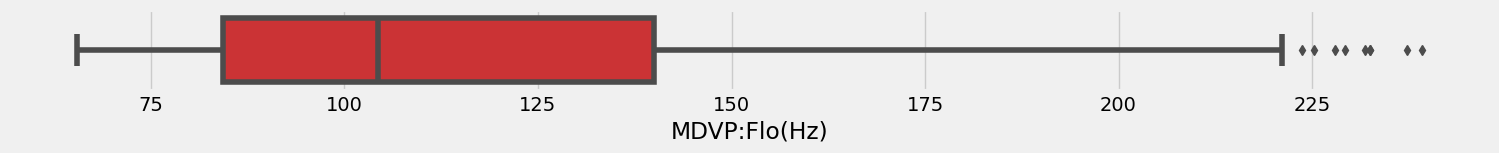

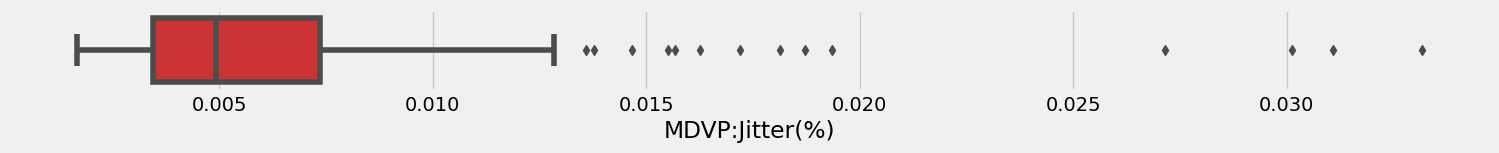

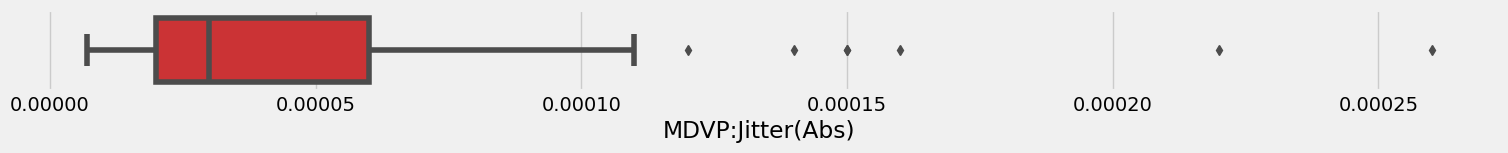

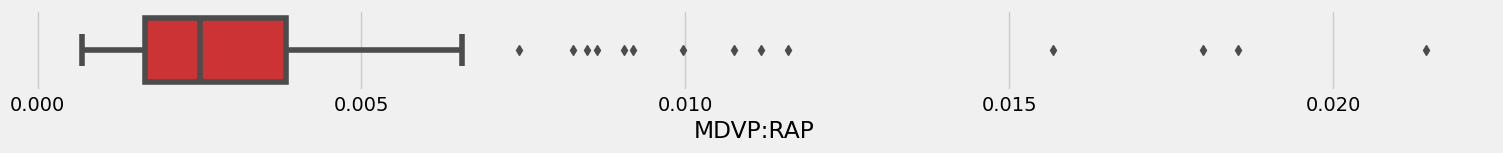

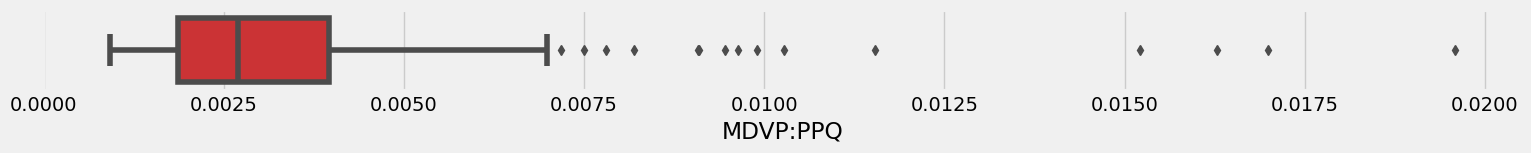

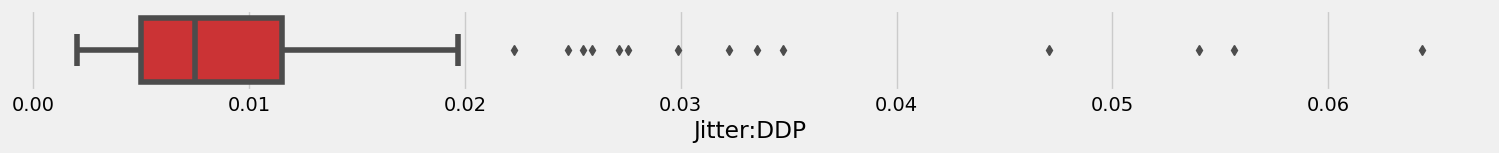

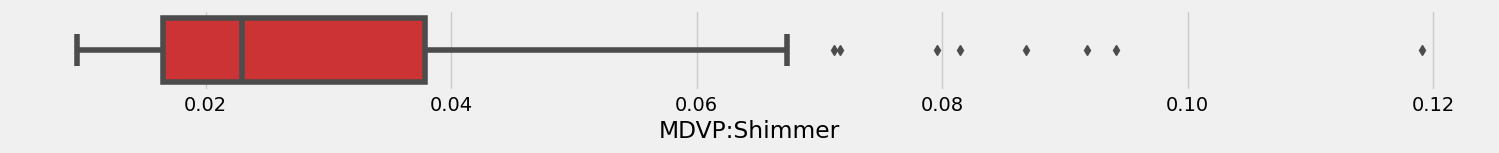

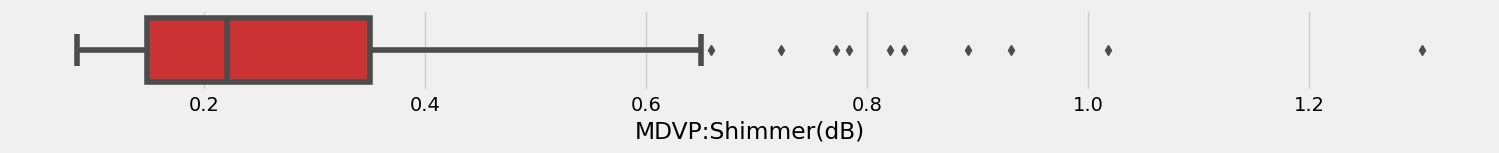

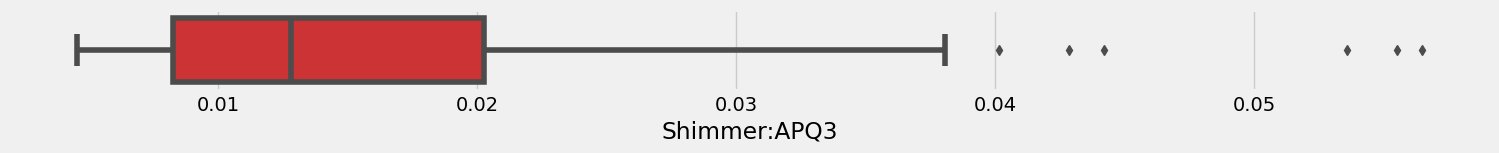

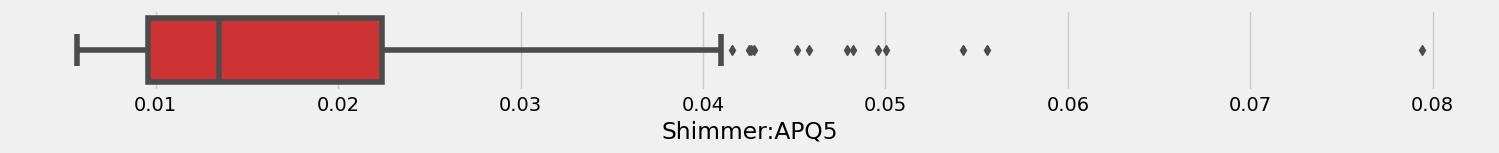

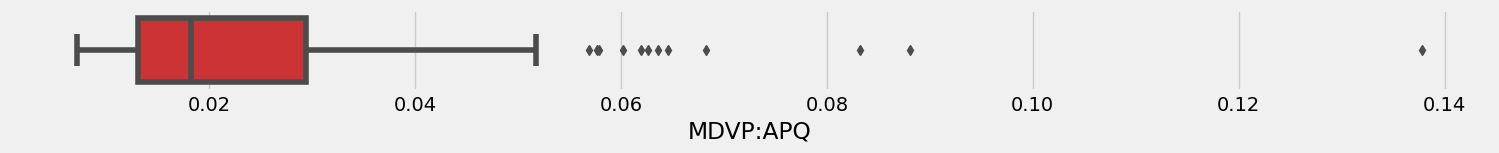

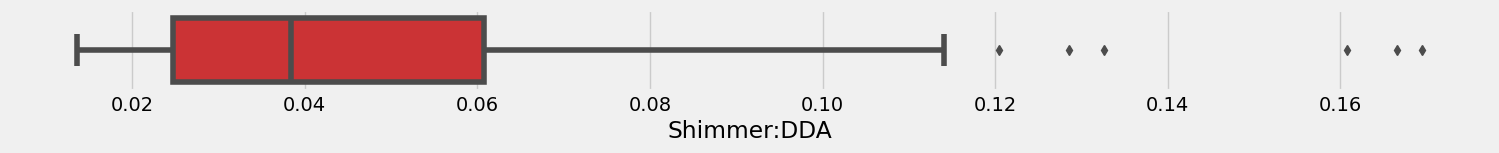

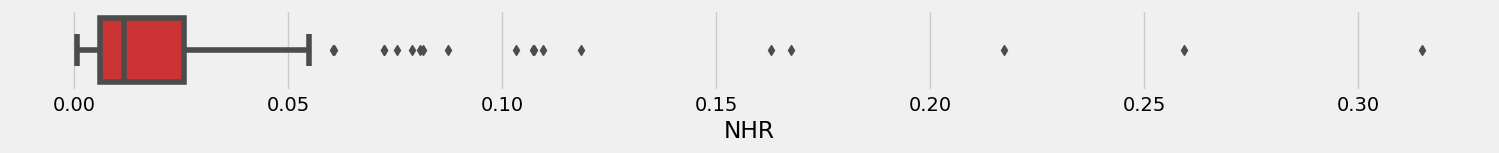

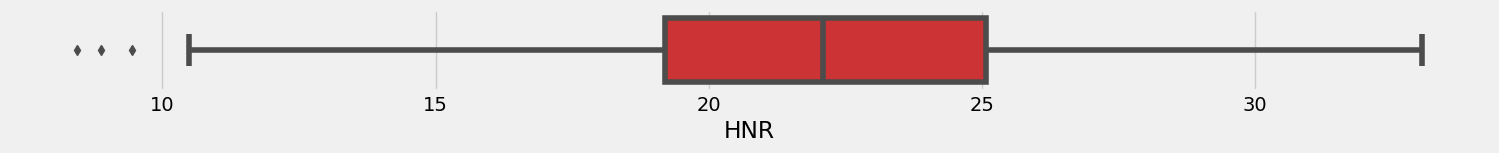

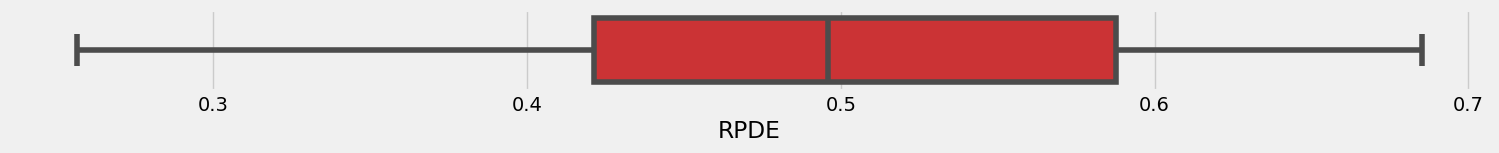

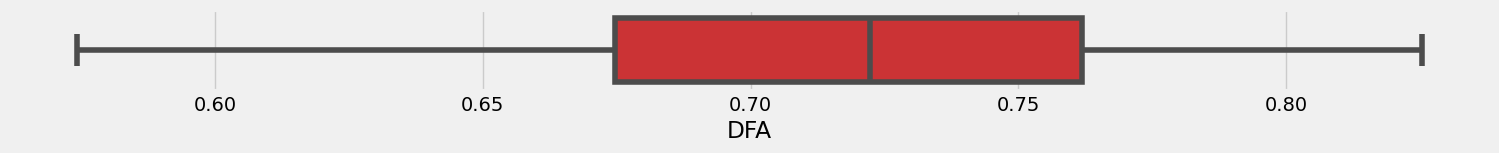

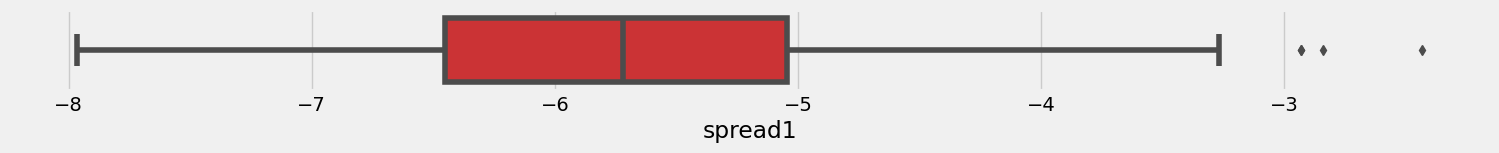

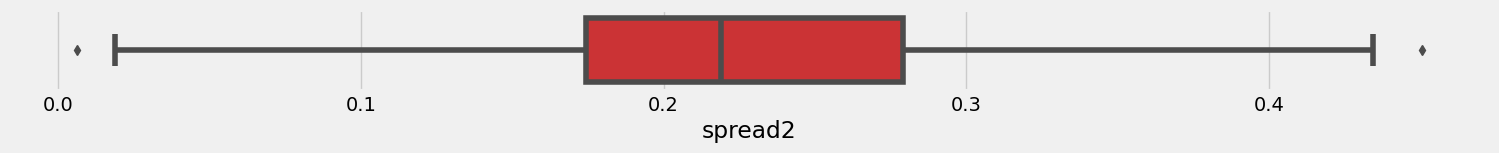

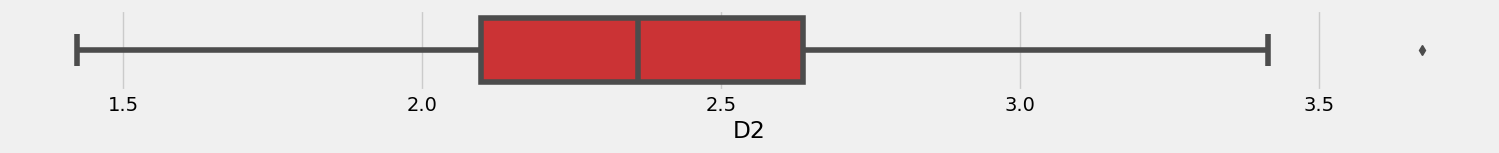

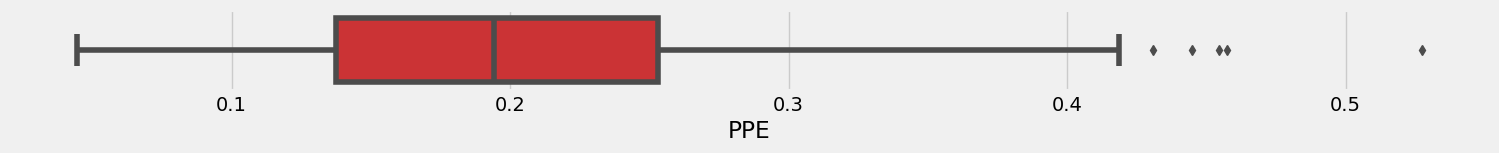

In [ ]:
for col in df2:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df2, x=col,palette='Set1')
plt.show()

### **Cleaning the Outlier**

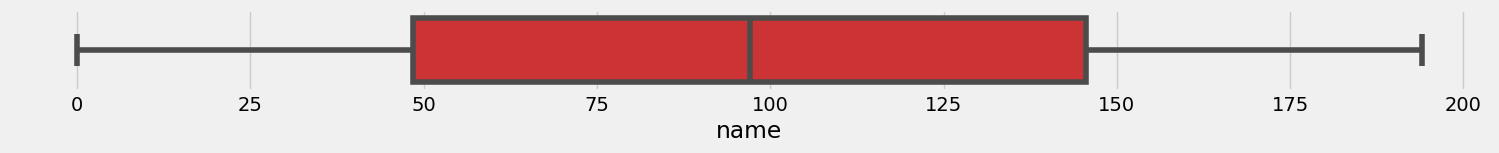

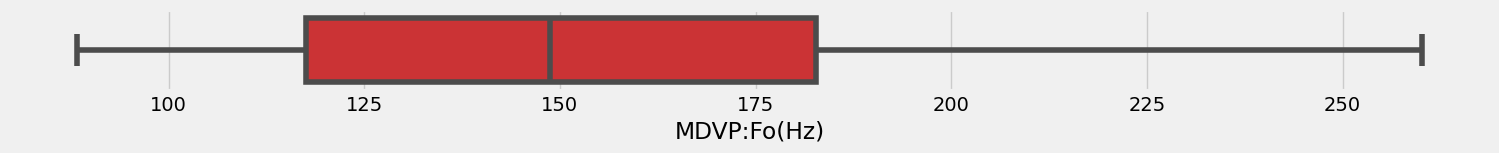

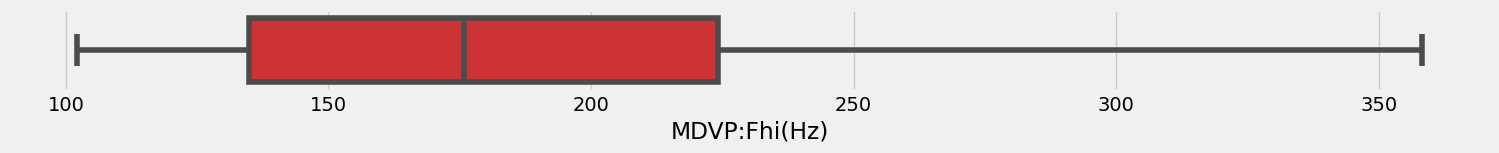

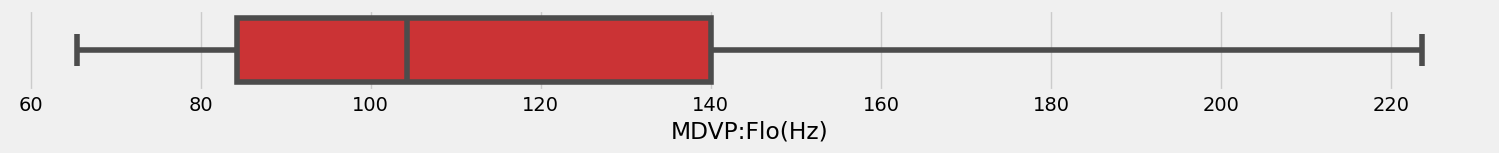

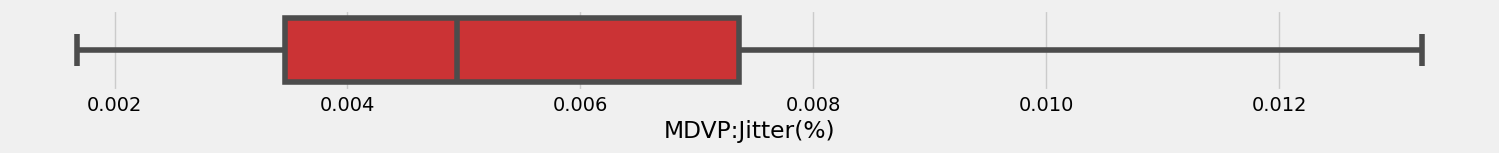

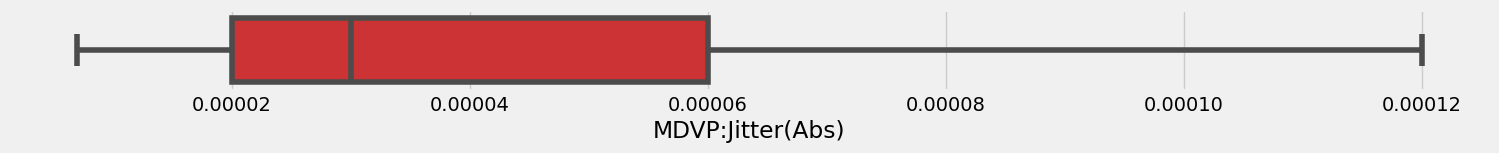

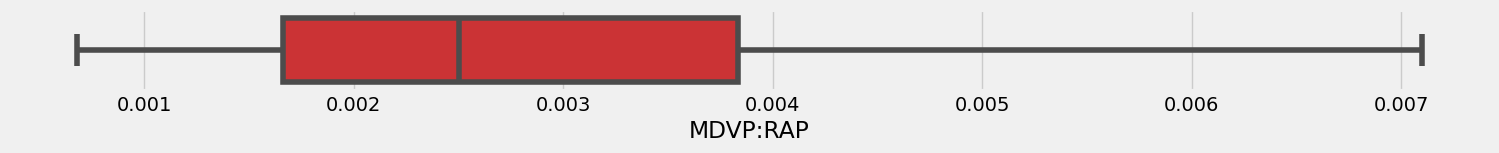

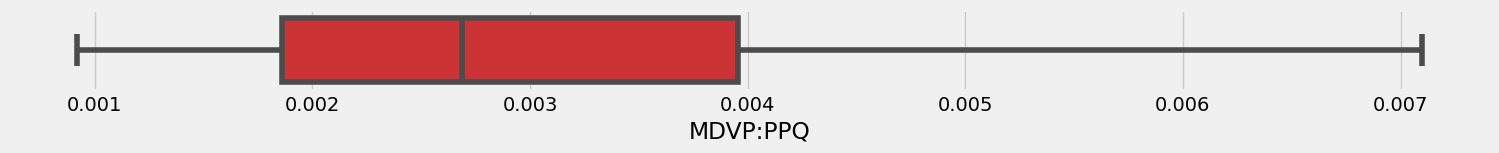

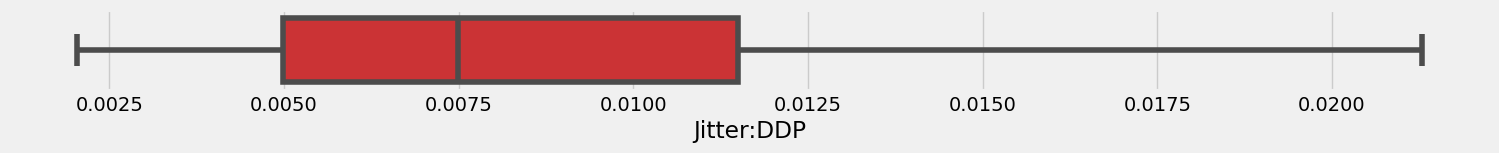

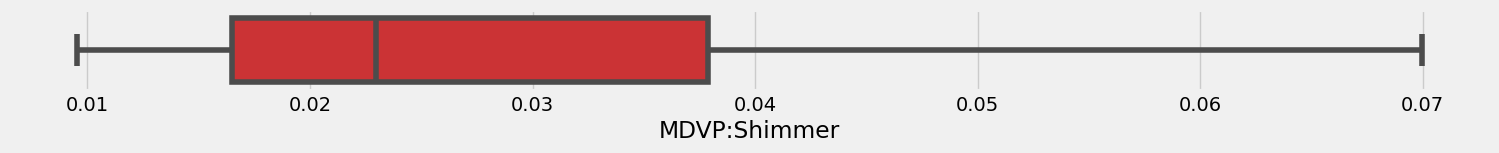

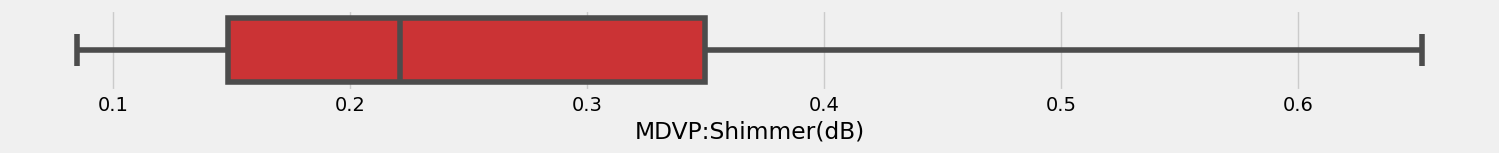

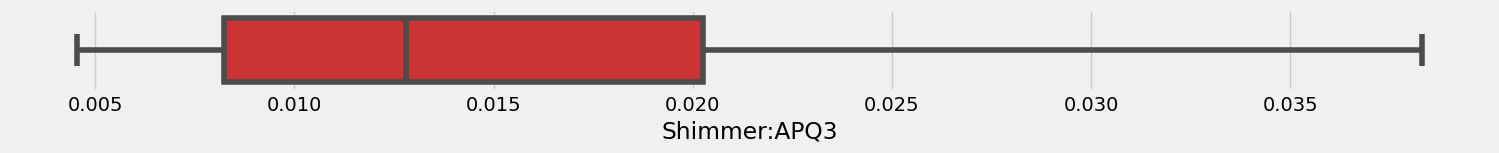

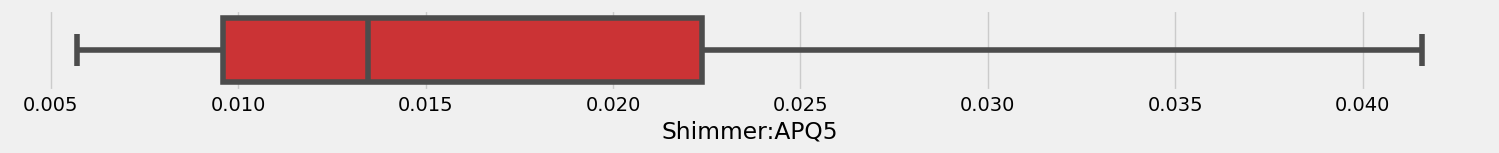

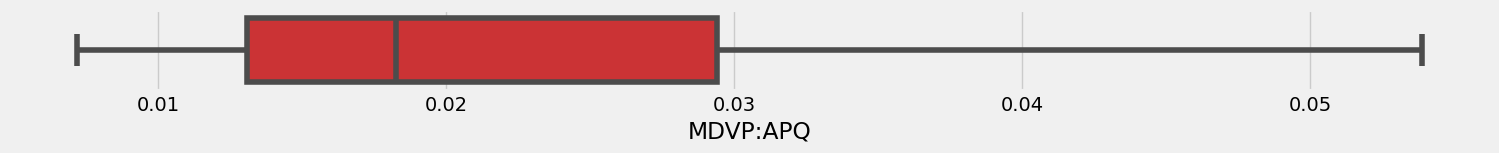

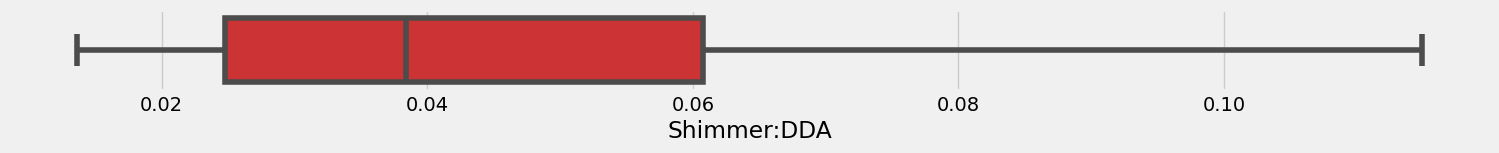

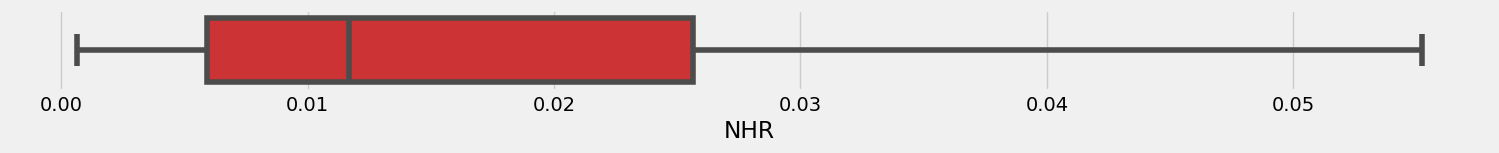

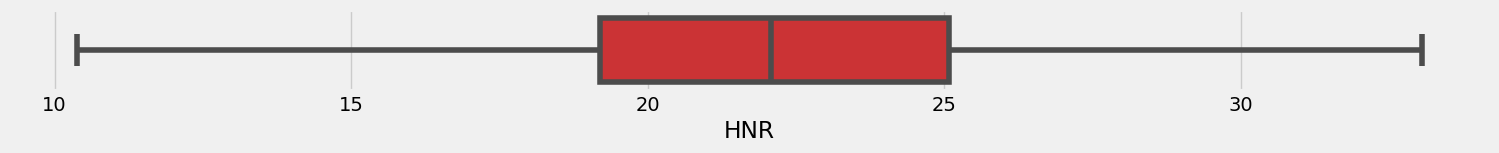

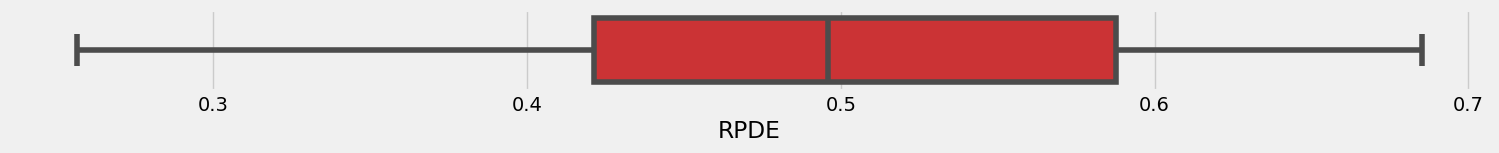

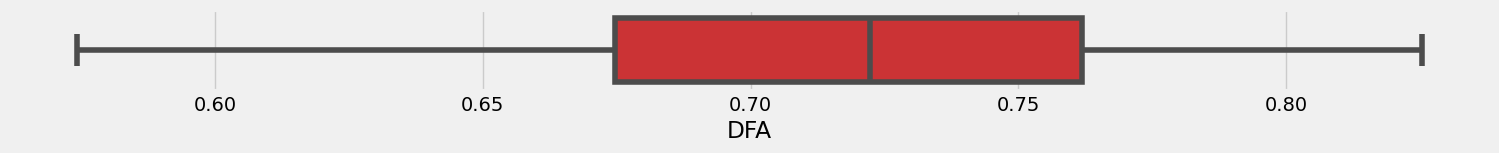

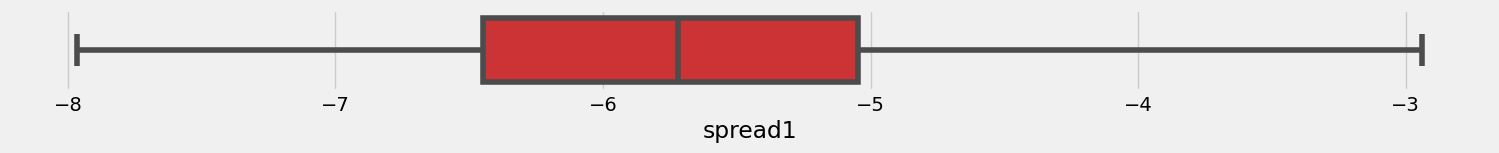

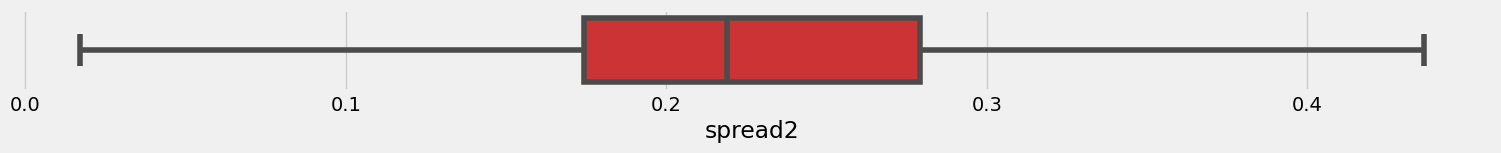

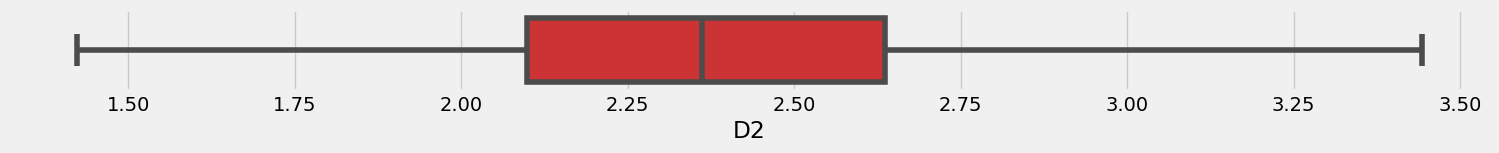

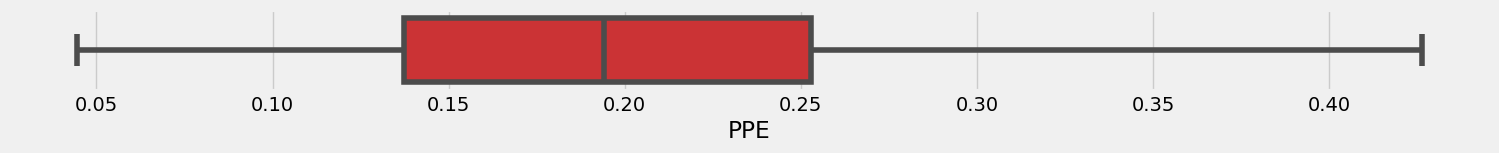

In [ ]:
for cols in df2:
    q1 = df2[cols].quantile(0.25)
    q3 = df2[cols].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + whisker_width * iqr
    df2[cols] = np.where(df2[cols] > upper_whisker, upper_whisker, np.where(df2[cols] < lower_whisker, lower_whisker, df2[cols]))

for col in df2:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df2, x=col,palette='Set1')

### **Combining the Clean Column in the df2 Dataframe**

In [ ]:
df2["status"] = df[["status"]]
df2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.005540,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,1.0,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.006960,0.01394,0.06134,0.626,0.03134,0.04158,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,2.0,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.007098,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,3.0,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.006980,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,4.0,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.007098,0.01966,0.06425,0.584,0.03490,0.04158,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


### **Exploratory Data Analysis**

DataFrame Head:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.005540,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,1.0,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.006960,0.01394,0.06134,0.626,0.03134,0.04158,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,2.0,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.007098,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1


DataFrame Tail:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
192,192.0,174.688,240.005,74.287,0.013222,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.055212,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,193.0,198.764,358.220,74.904,0.007400,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.055212,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0
194,194.0,214.289,260.277,77.973,0.005670,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.043980,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(195, 24)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    float64
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-nu

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
name,195,97,97,56.436,0,48.5,97,145.5,194,0.000000,-1.200063
MDVP:Fo(Hz),195,154.229,148.79,41.39,88.333,117.572,148.79,182.769,260.105,0.587176,-0.642526
MDVP:Fhi(Hz),195,188.495,175.829,62.535,102.145,134.863,175.829,224.206,358.22,1.053261,0.863809
MDVP:Flo(Hz),195,115.982,104.315,42.62,65.476,84.291,104.315,140.019,223.61,1.140698,0.358032
MDVP:Jitter(%),195,0.006,0.005,0.003,0.002,0.003,0.005,0.007,0.013,1.113477,0.574499
MDVP:Jitter(Abs),195,0,0,0,0,0,0,0,0,1.135287,0.834913
MDVP:RAP,195,0.003,0.003,0.002,0.001,0.002,0.003,0.004,0.007,1.083410,0.393861
MDVP:PPQ,195,0.003,0.003,0.002,0.001,0.002,0.003,0.004,0.007,1.069805,0.329413
Jitter:DDP,195,0.009,0.007,0.005,0.002,0.005,0.007,0.012,0.021,1.083012,0.392931
MDVP:Shimmer,195,0.029,0.023,0.017,0.01,0.017,0.023,0.038,0.07,1.075422,0.150903


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



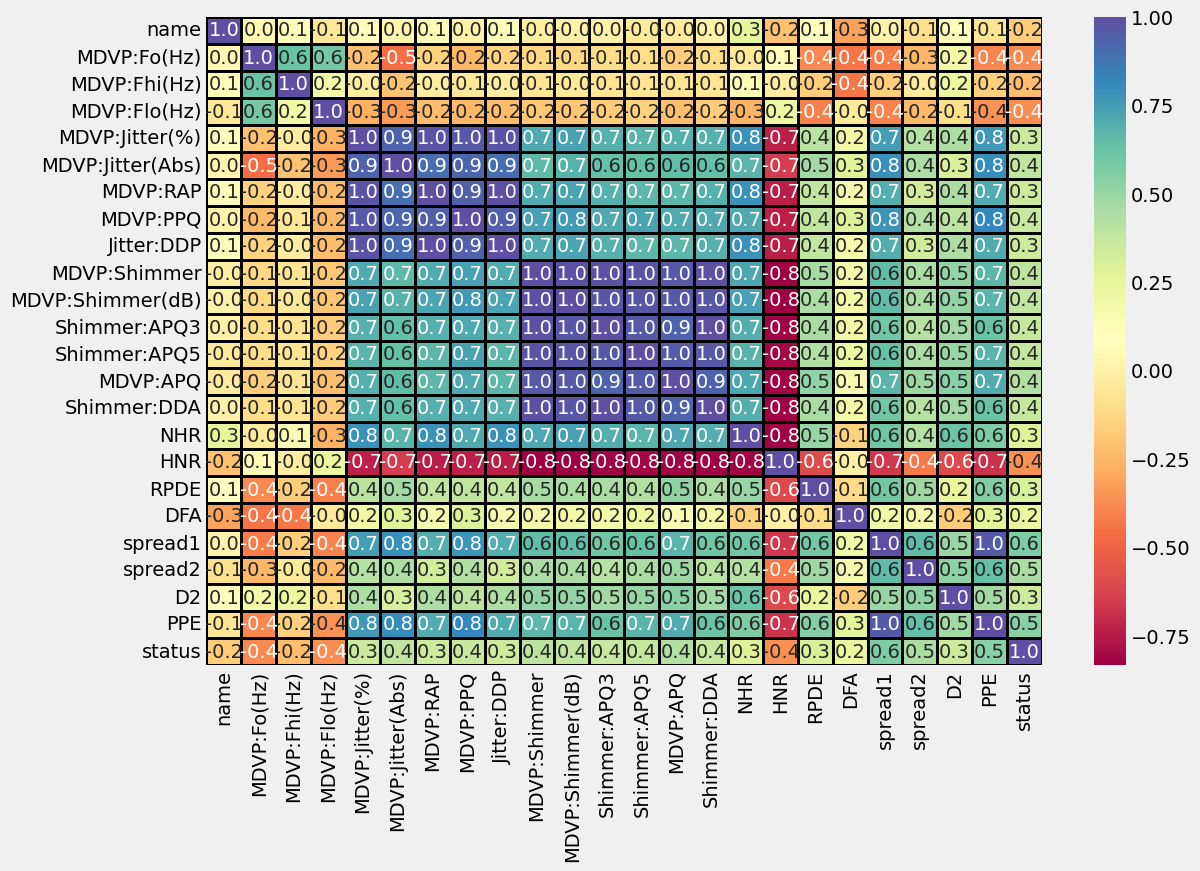

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



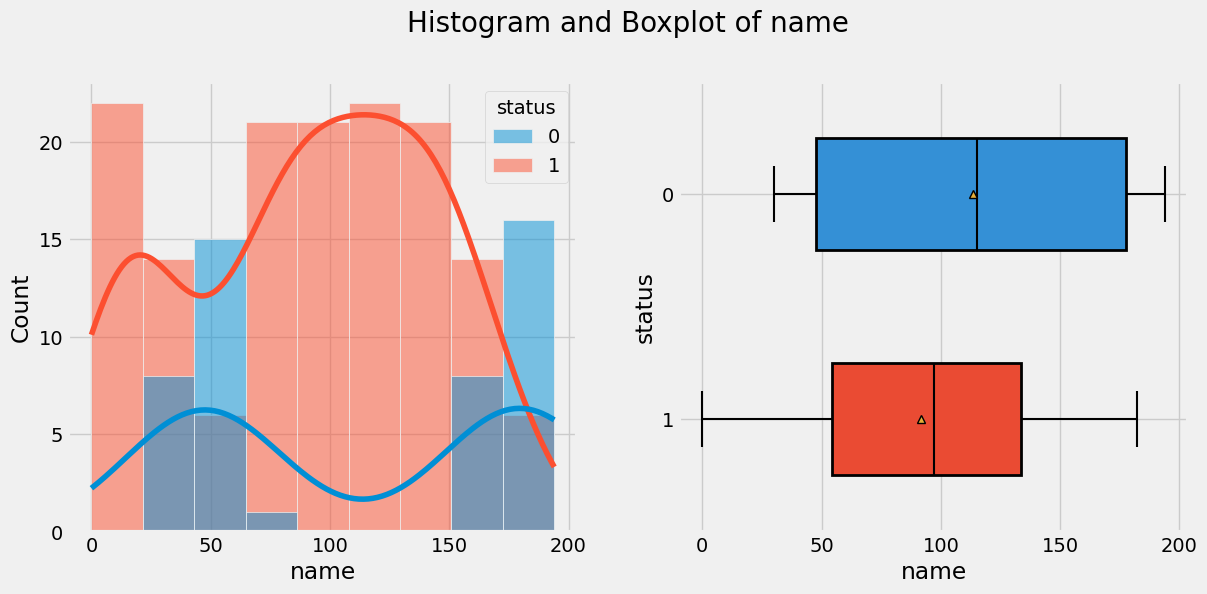

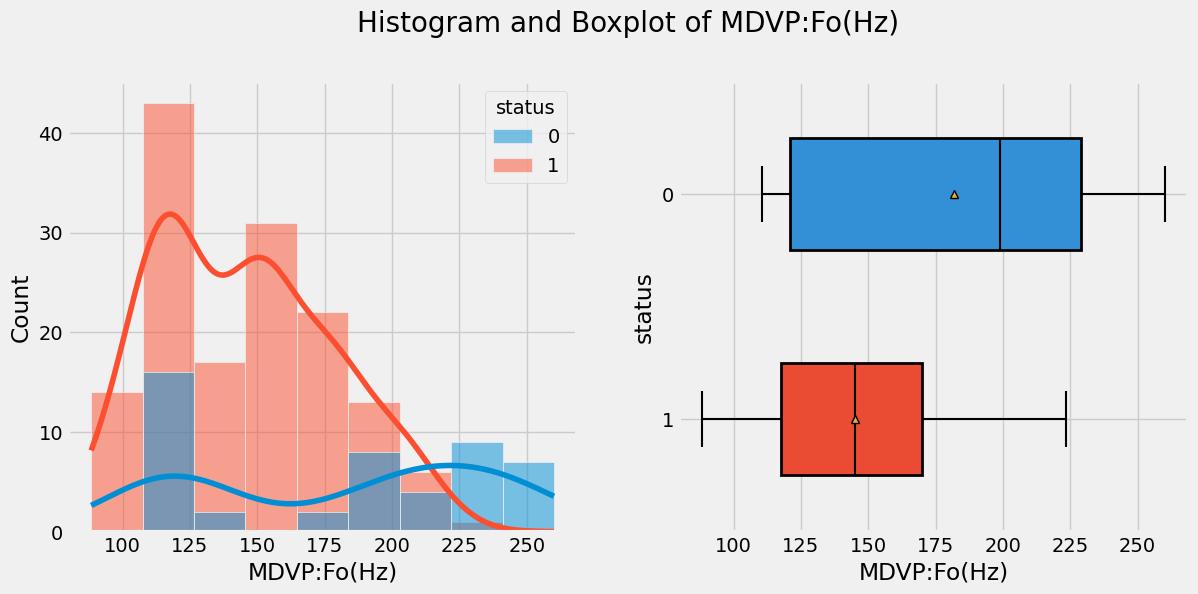

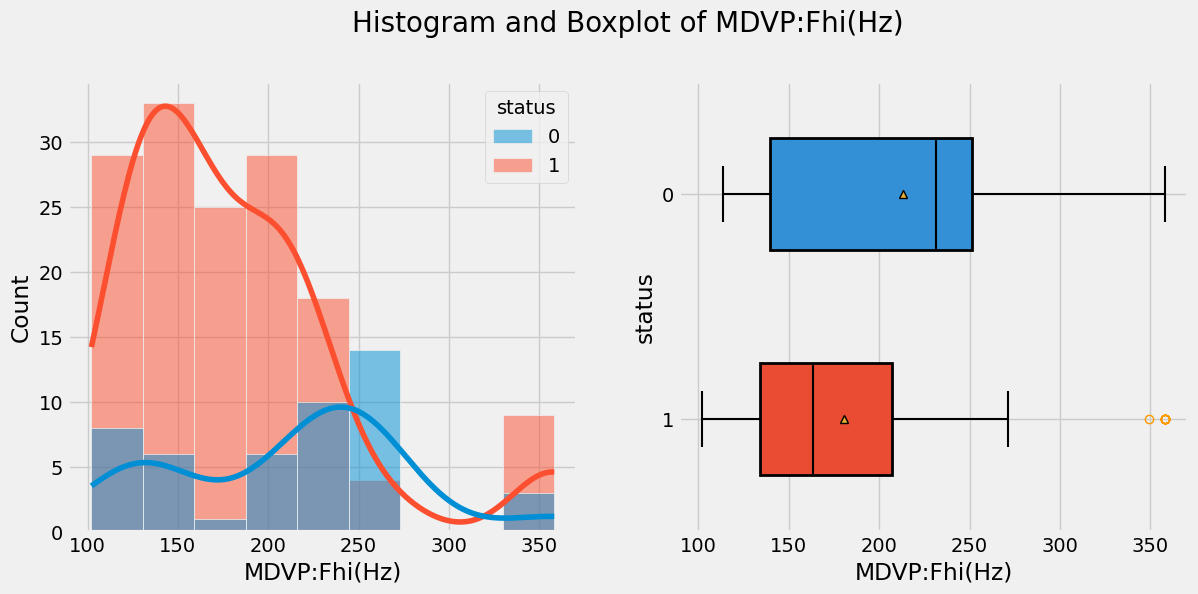

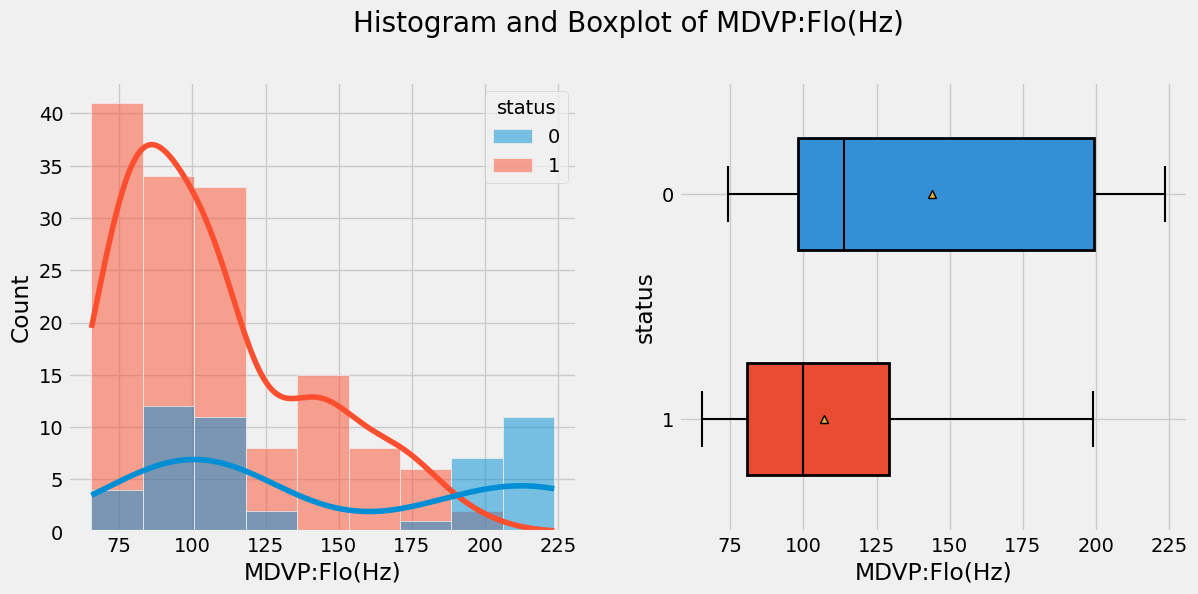

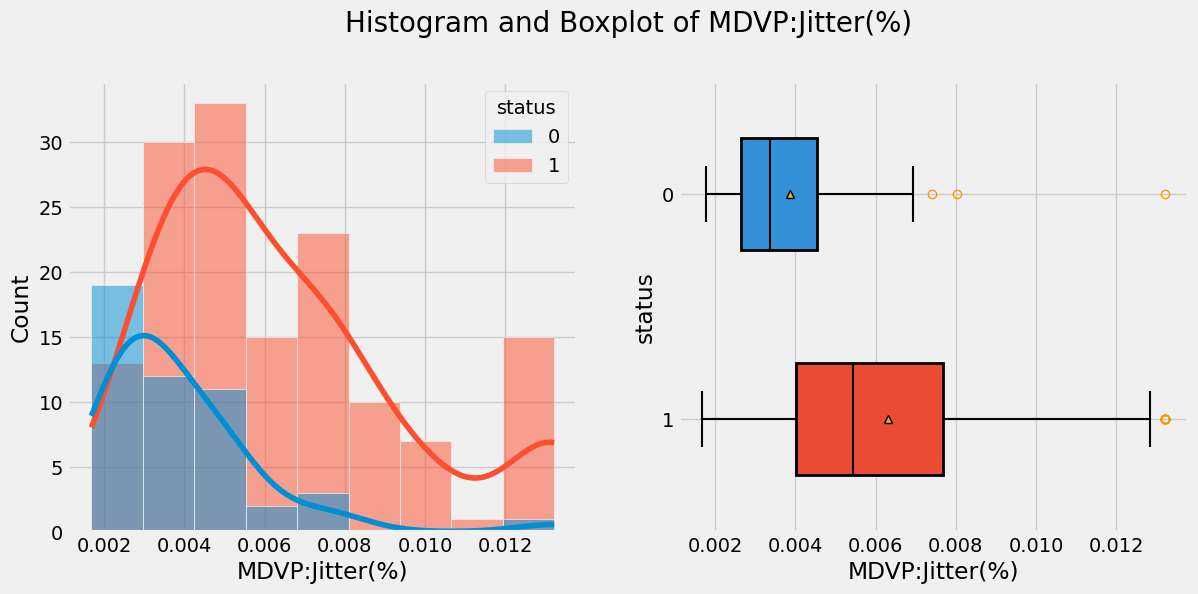

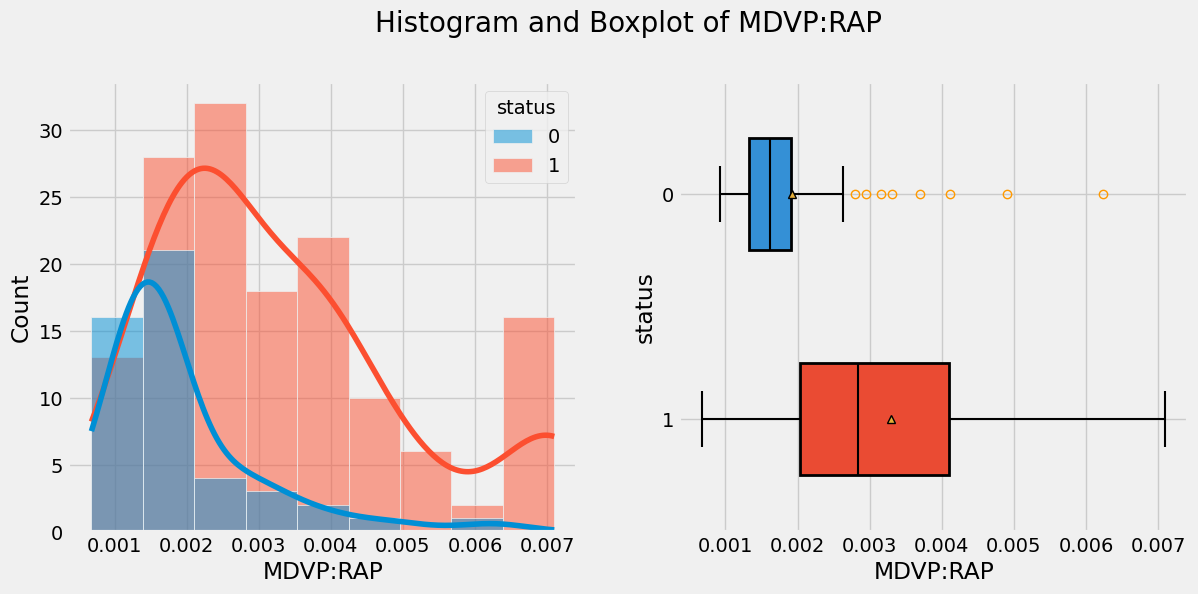

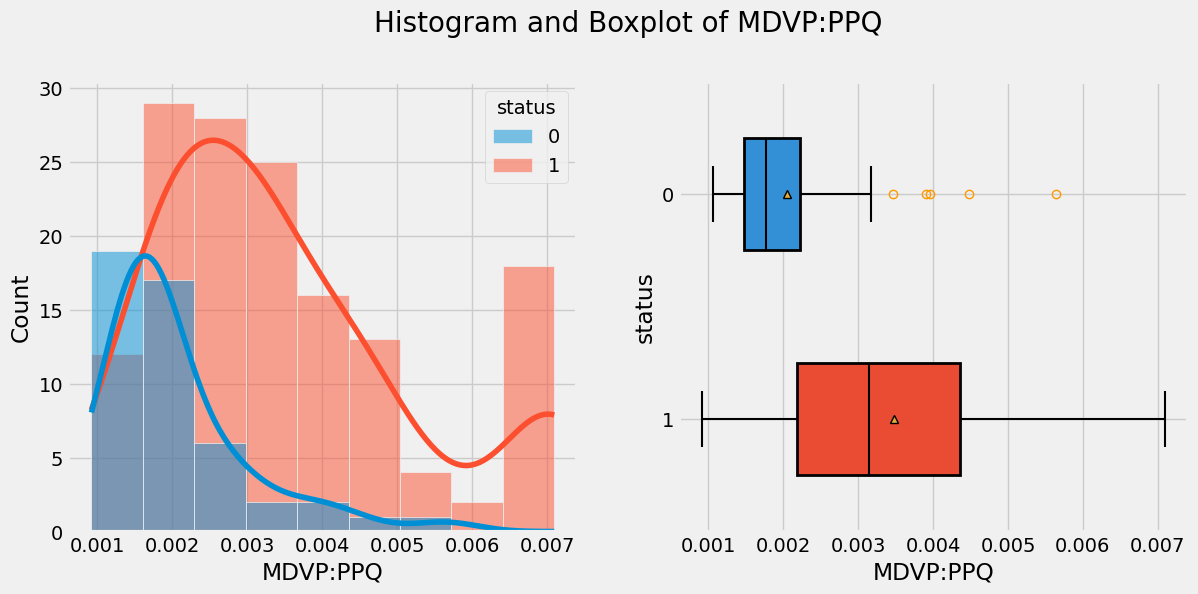

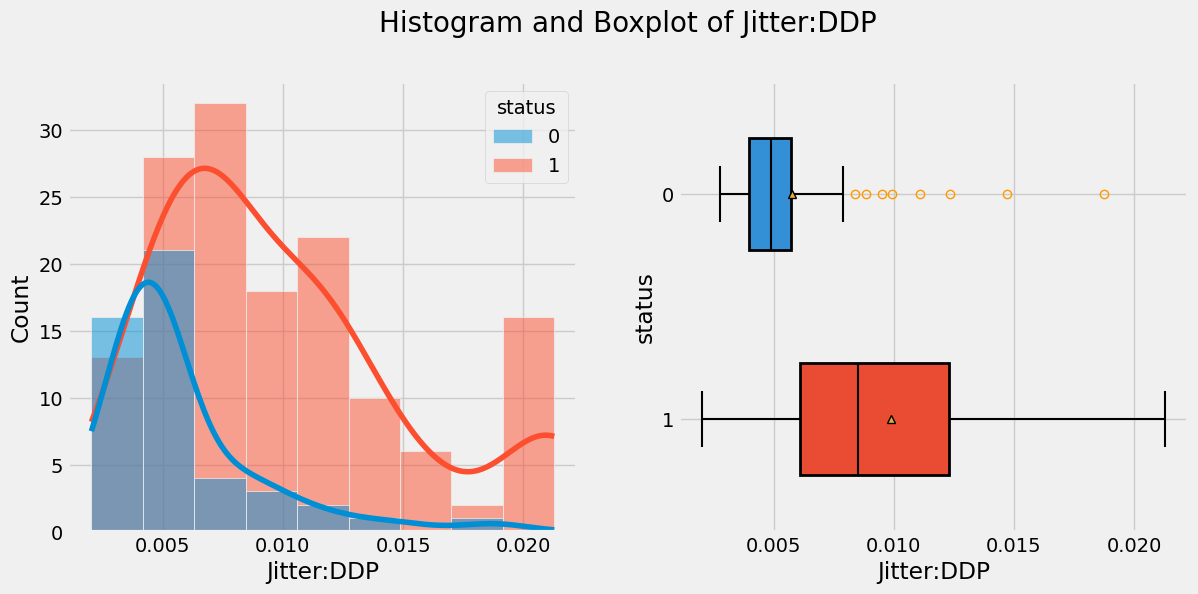

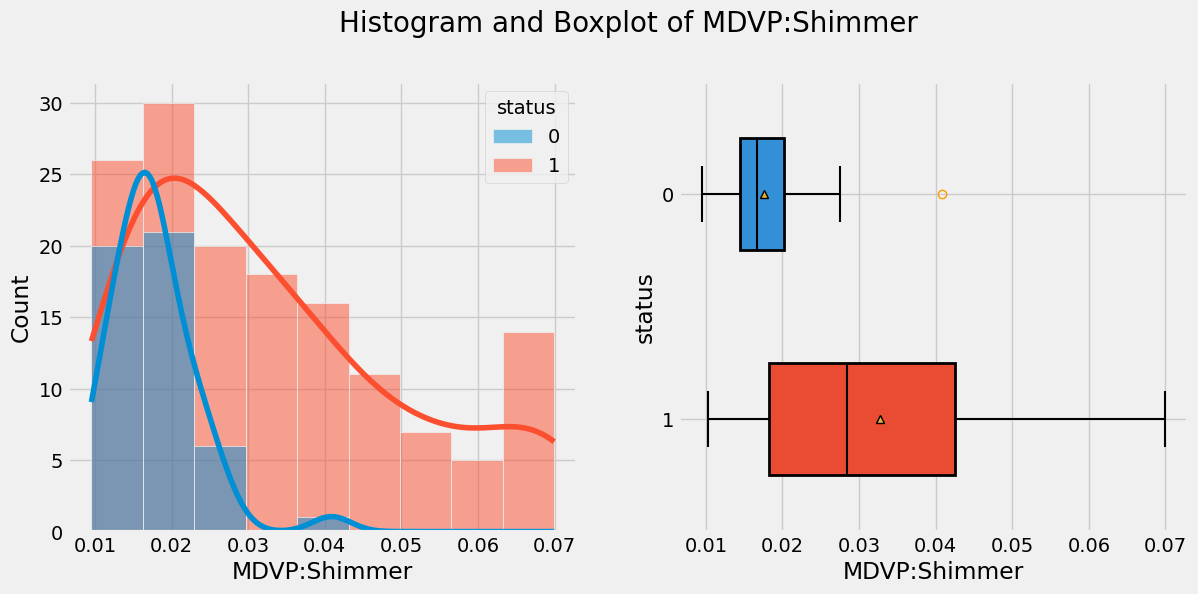

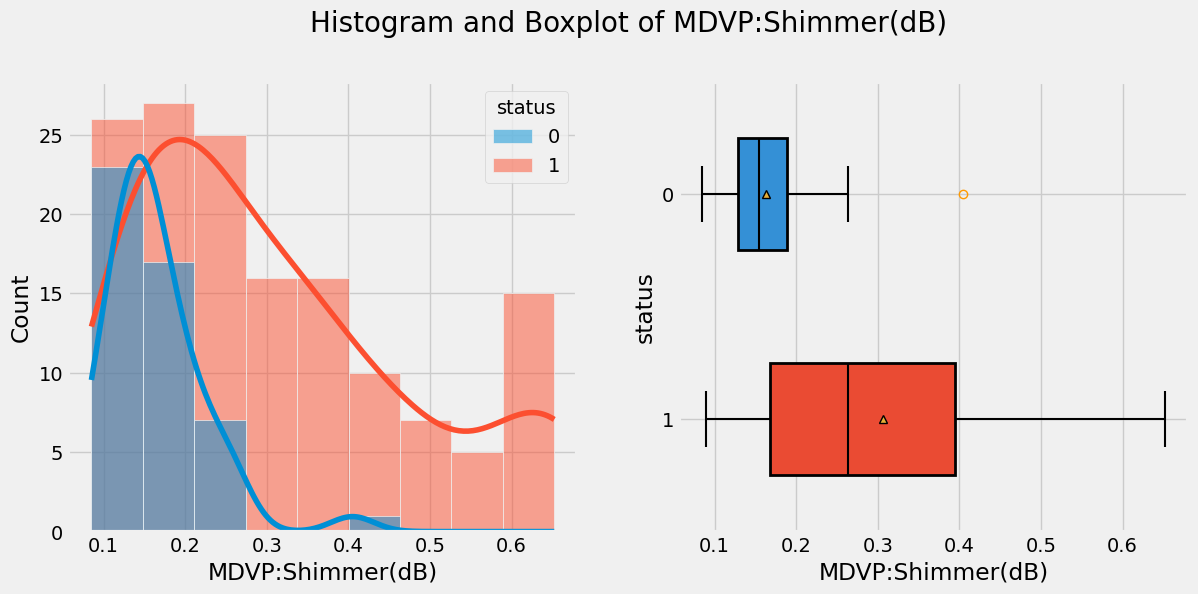

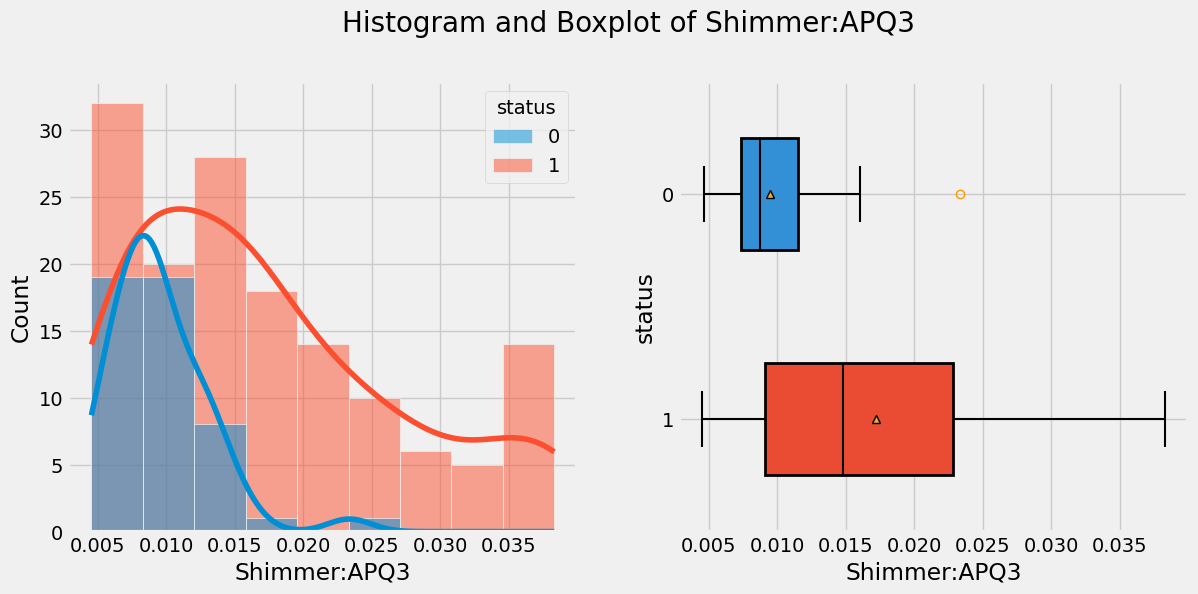

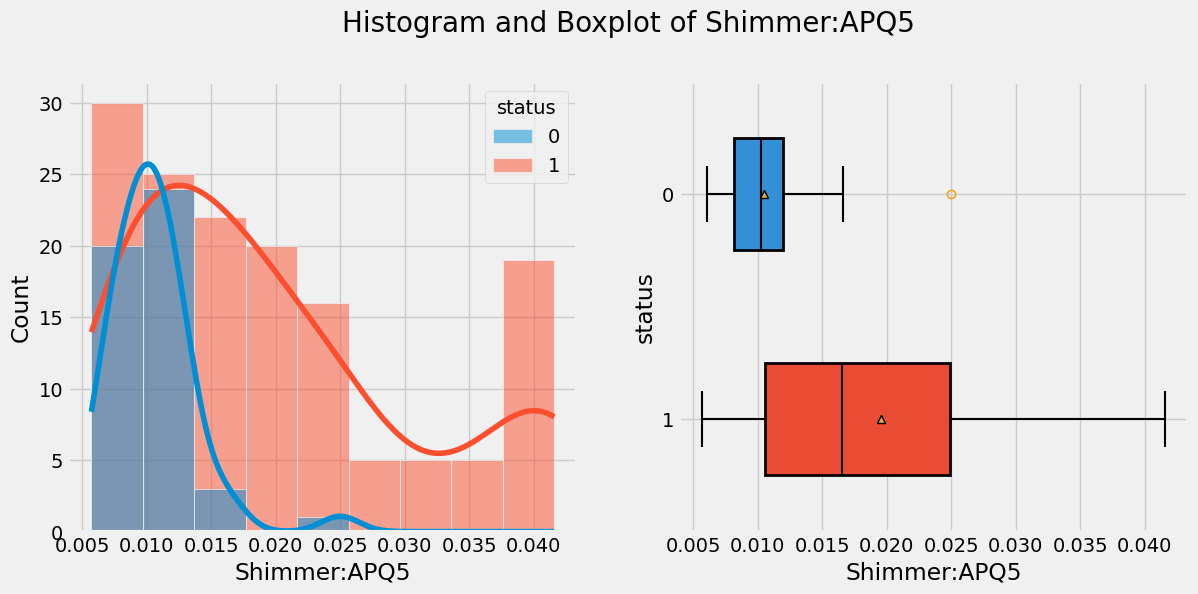

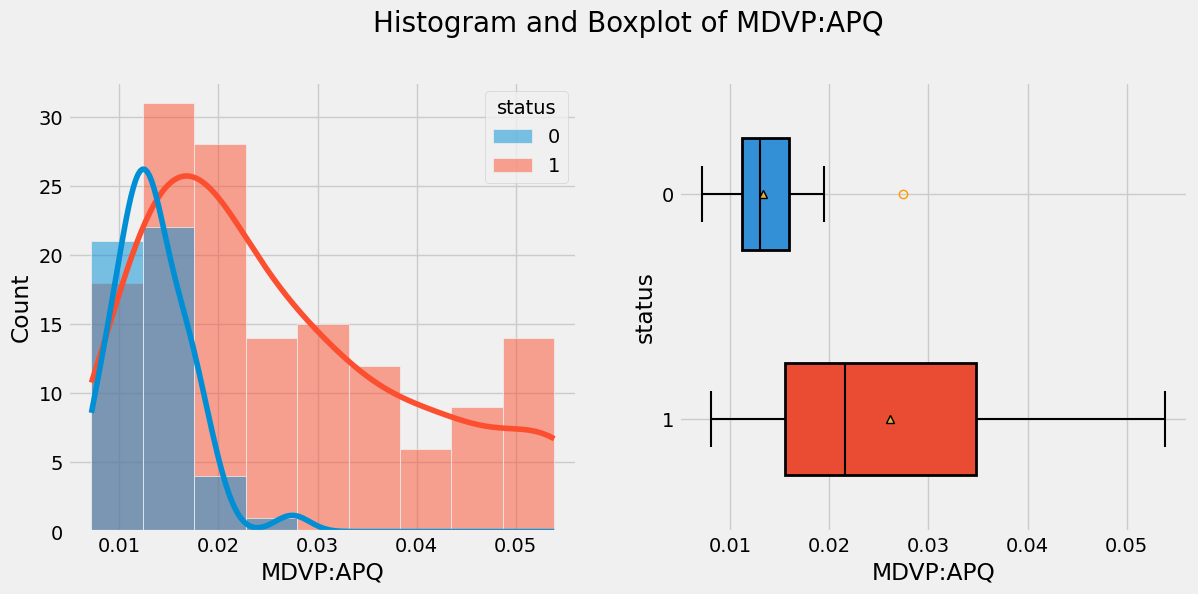

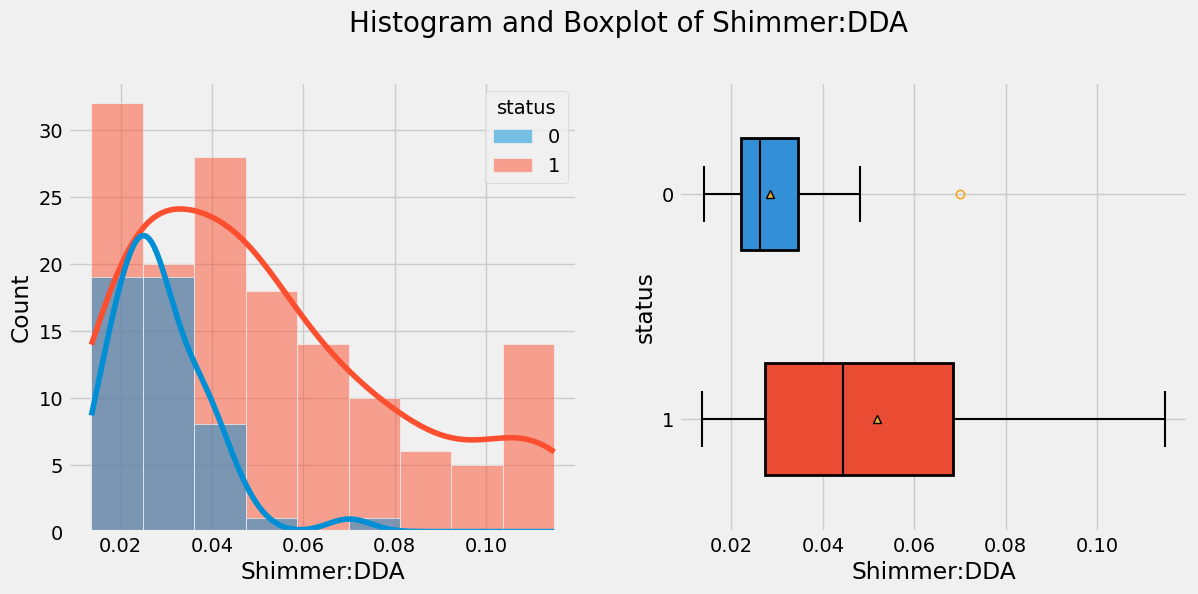

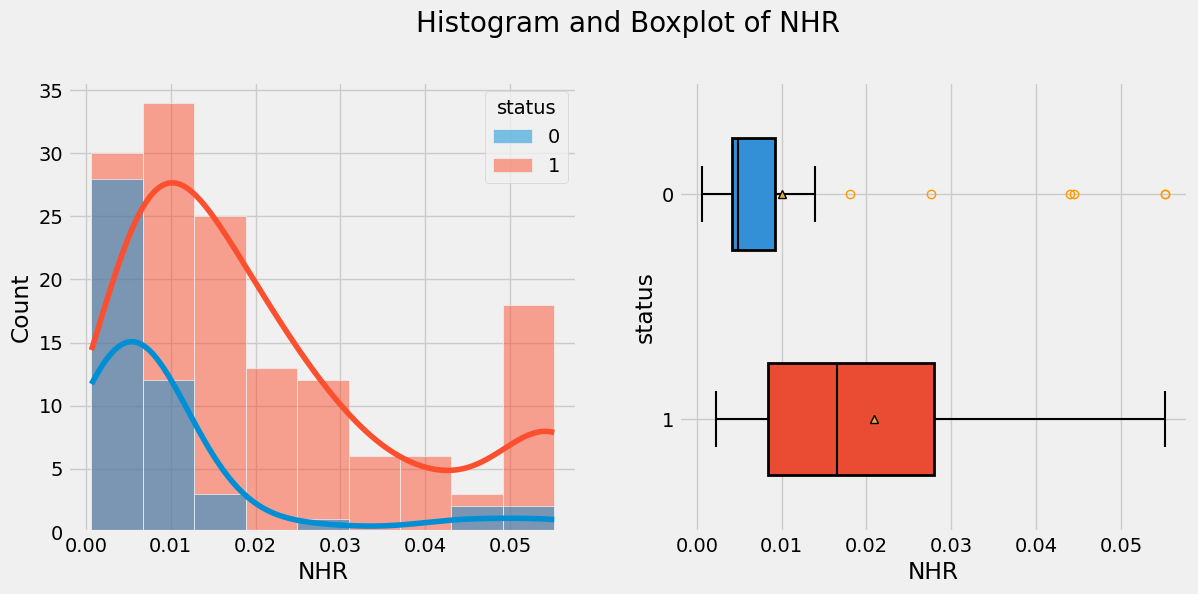

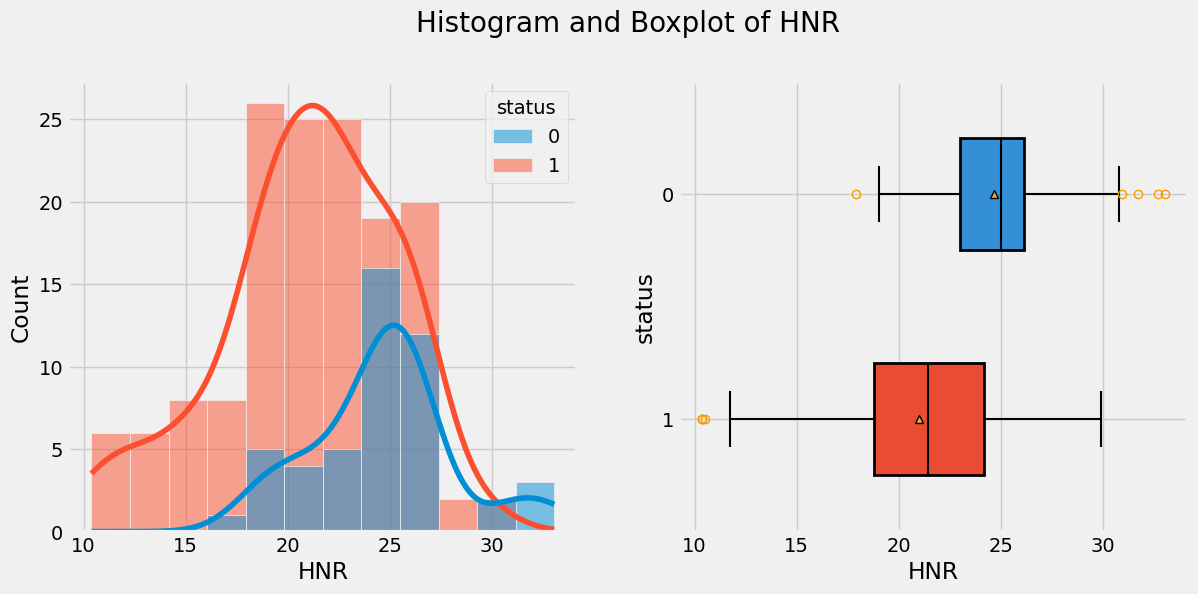

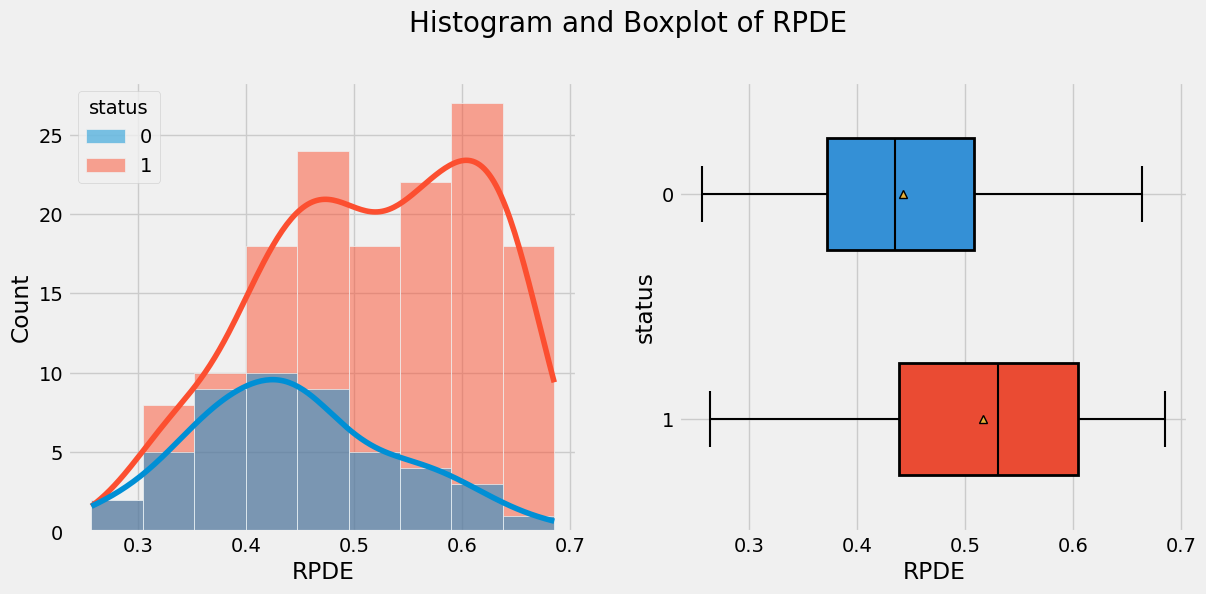

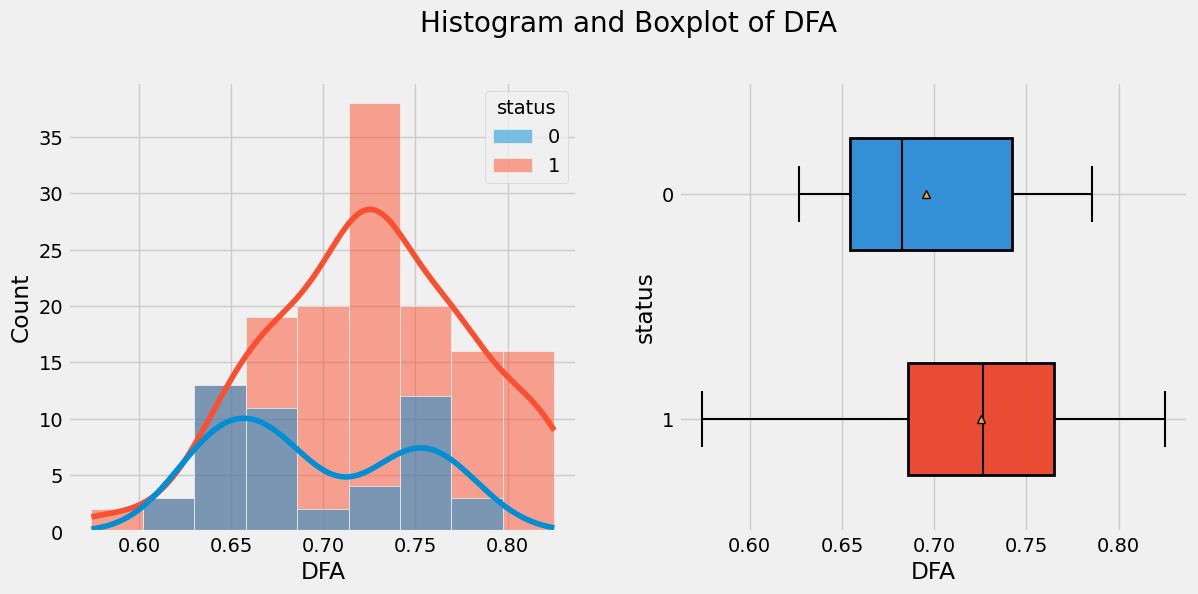

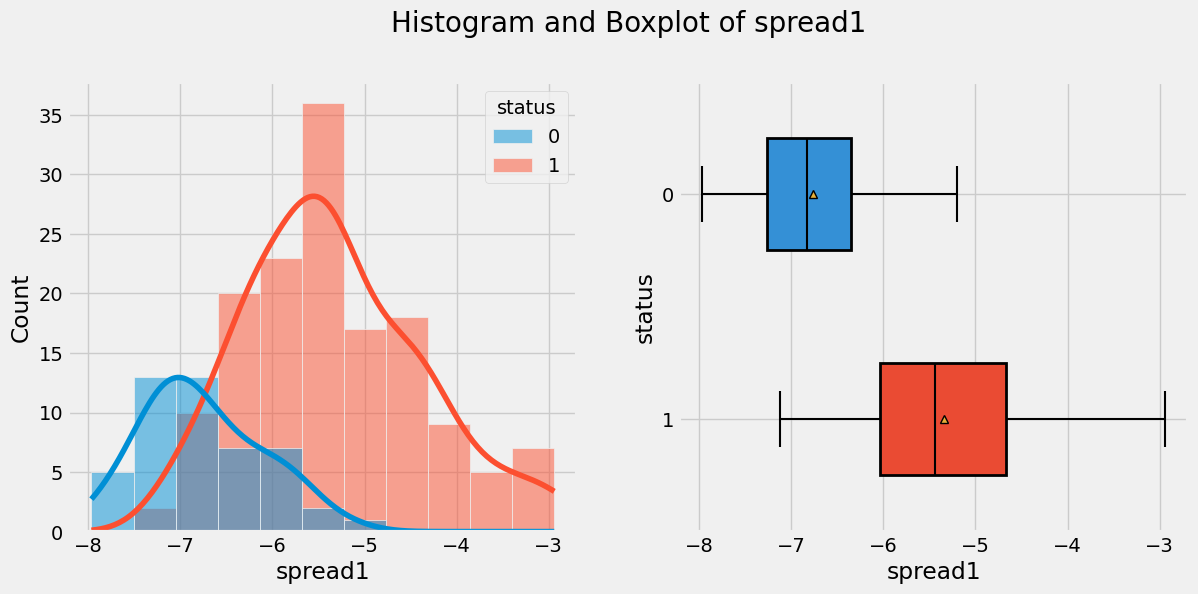

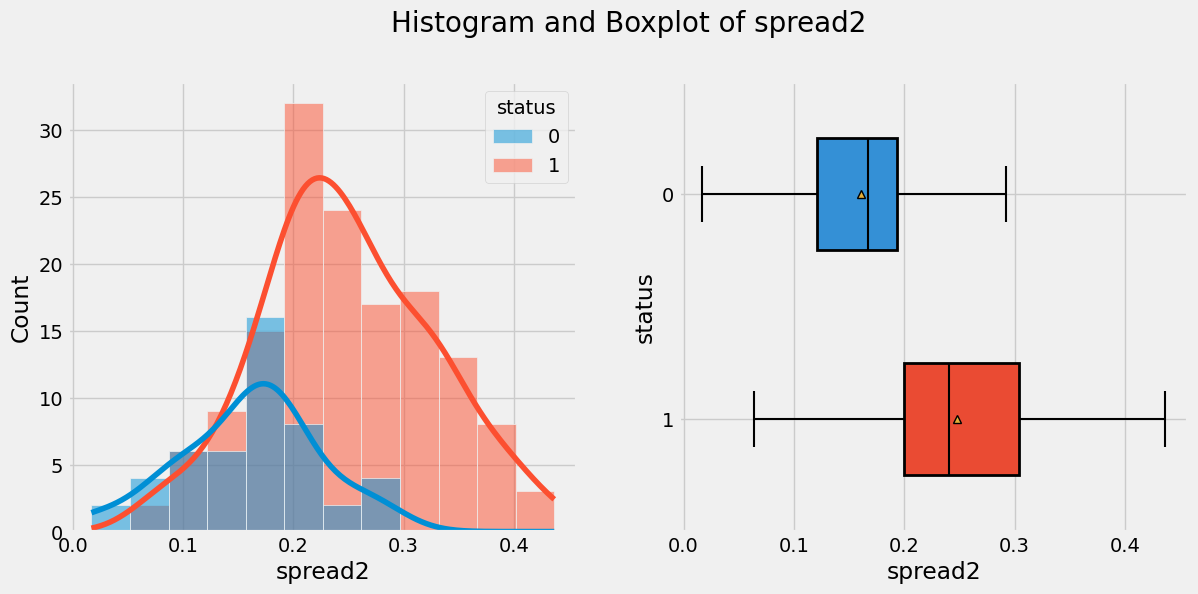

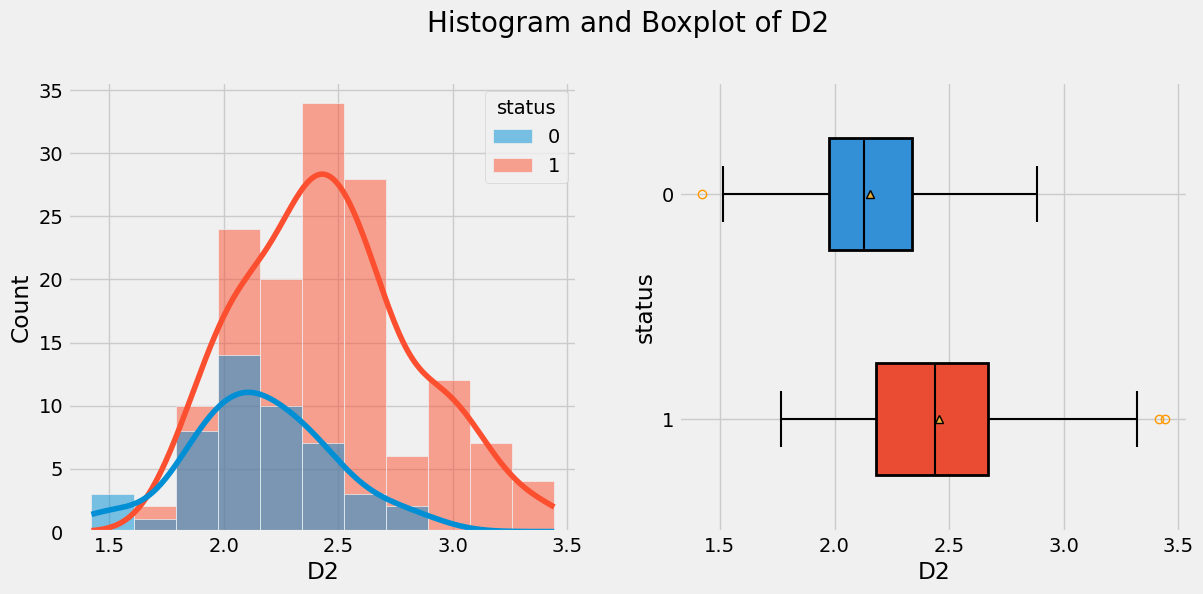

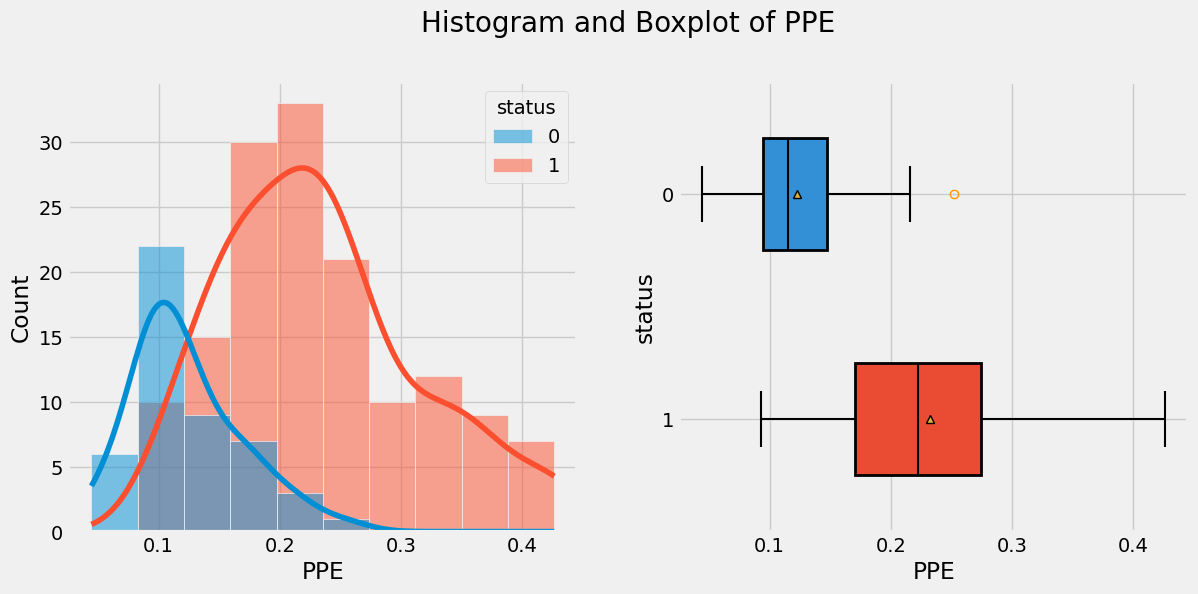

----------------------------------------------------------------------------------------------------
Countplot(s):



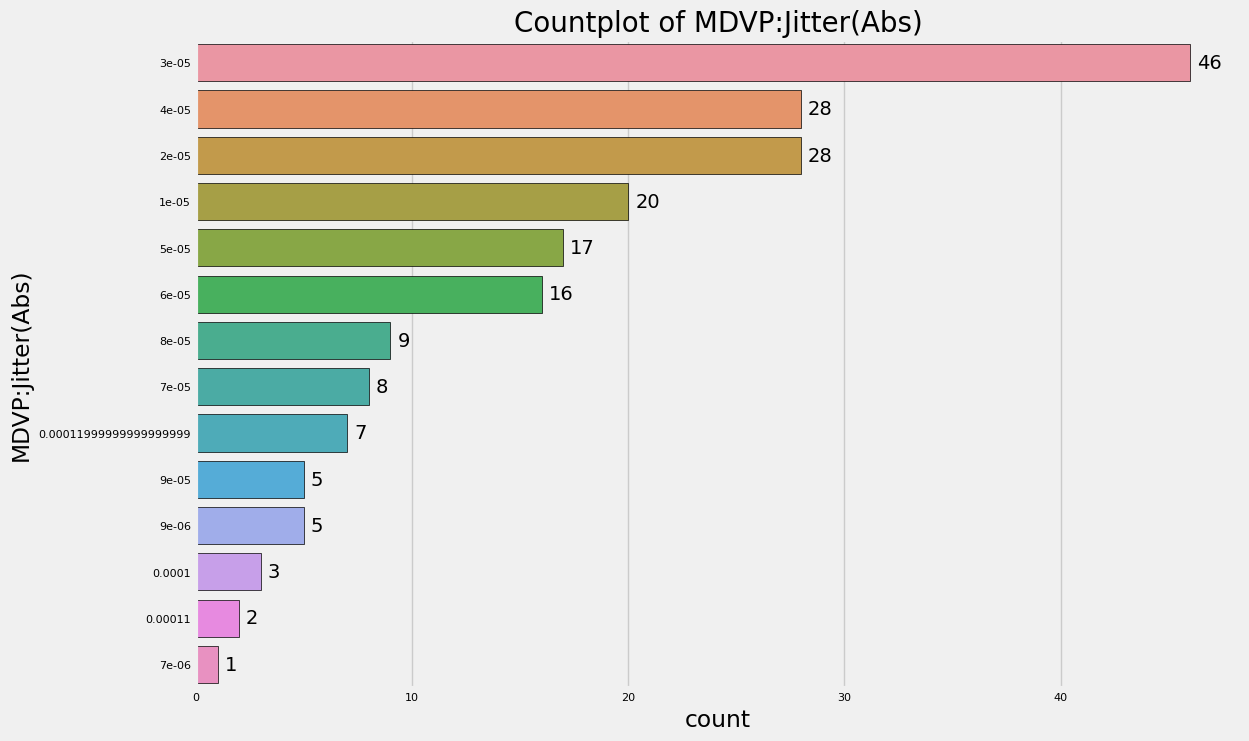

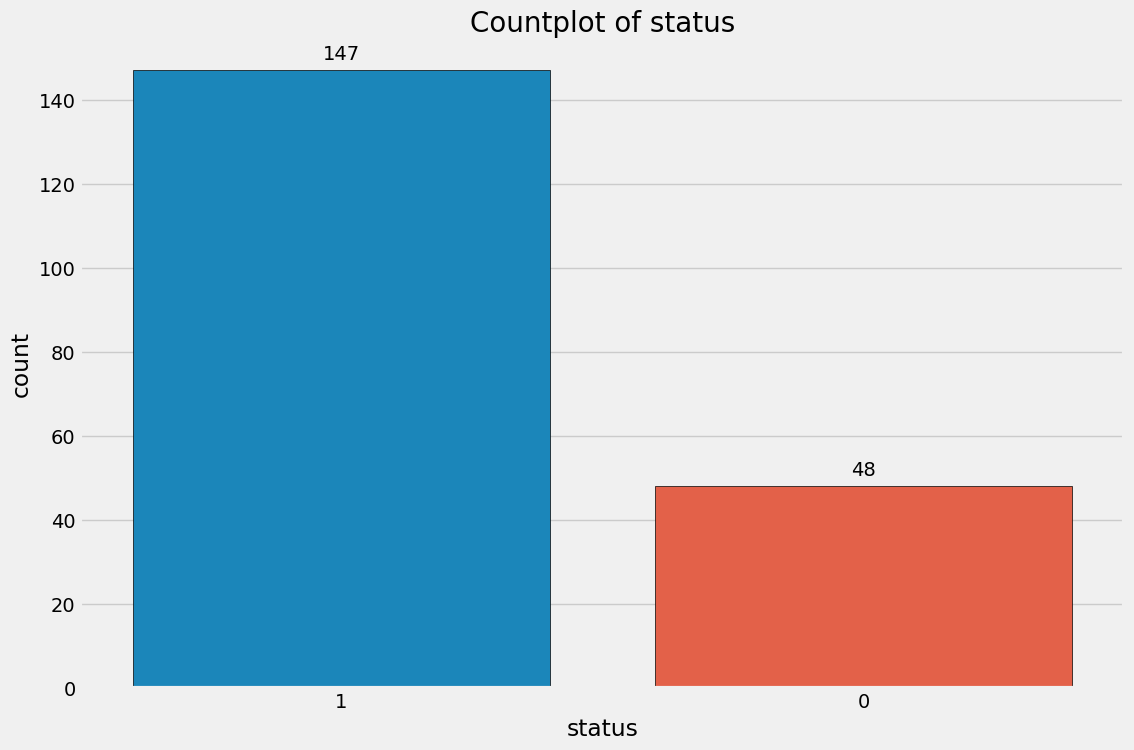

In [ ]:
fast_eda(df2,target='status')

### **Splitting the Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df2.drop(labels=["status"],axis=1),
    df2['status'],
    test_size = 0.25,
    random_state = 0)

In [ ]:
x_train.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
92,92.0,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,0.383,0.02383,0.02521,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
185,185.0,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,0.136,0.00667,0.00990,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
24,24.0,163.656,200.841,76.779,0.00742,0.00005,0.00380,0.00390,0.01140,0.01659,0.164,0.00738,0.00948,0.01497,0.02214,0.01778,23.831,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961
30,30.0,197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.00680,0.00802,0.01689,0.00339,26.775,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
109,109.0,193.030,208.900,80.297,0.00766,0.00004,0.00450,0.00389,0.01351,0.03044,0.275,0.01771,0.01815,0.02084,0.05312,0.00947,21.934,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668


In [ ]:
x_test.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
83,83.0,98.804,102.305,87.804,0.00432,0.000040,0.00247,0.00258,0.00742,0.02223,0.202,0.01277,0.01343,0.01552,0.03831,0.00882,22.244,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275
12,12.0,136.926,159.866,131.276,0.00293,0.000020,0.00118,0.00153,0.00355,0.01259,0.112,0.00656,0.00717,0.01140,0.01968,0.00581,25.703,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
33,33.0,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,0.00469,0.00606,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
113,113.0,210.141,232.706,185.258,0.00534,0.000030,0.00321,0.00280,0.00964,0.01680,0.149,0.00861,0.01017,0.01301,0.02583,0.00620,23.671,0.441097,0.722254,-5.963040,0.250283,2.489191,0.177807
171,171.0,112.547,133.374,105.715,0.00355,0.000030,0.00166,0.00190,0.00499,0.01358,0.129,0.00664,0.00786,0.01140,0.01992,0.00435,26.436,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376


In [ ]:
y_train.head(5)

92     1
185    0
24     1
30     0
109    1
Name: status, dtype: int64

In [ ]:
y_test.head(5)

83     1
12     1
33     0
113    1
171    0
Name: status, dtype: int64

### **Machine Learning Model**

In [ ]:
models={"Logistic Regression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "Random Forest":RandomForestClassifier(),
        "Naive Bayes":RandomForestClassifier(),
        "KNN Classifier": KNeighborsClassifier()}

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  model_train_accuracy=accuracy_score(y_train,y_train_pred)
  model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
  model_train_precision=precision_score(y_train,y_train_pred)
  model_train_recall=recall_score(y_train,y_train_pred)
  model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

  model_test_accuracy=accuracy_score(y_test,y_test_pred)
  model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
  model_test_precision=precision_score(y_test,y_test_pred)
  model_test_recall=recall_score(y_test,y_test_pred)
  model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model performance for Training Set')
  print("-Accuracy: {:.4f}".format(model_train_accuracy))
  print("-F1 Score: {:.4f}".format(model_train_f1))
  print("-Precision: {:.4f}".format(model_train_precision))
  print("-Recall {:.4f}".format(model_train_recall))
  print("-ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

  print('--------------------------------')

  print('Model performance for Testing Set')
  print("-Accuracy: {:.4f}".format(model_test_accuracy))
  print("-F1 Score: {:.4f}".format(model_test_f1))
  print("-Precision: {:.4f}".format(model_test_precision))
  print("-Recall: {:.4f}".format(model_test_recall))
  print("-ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
  print('-----------------------------------------------')
  print('-----------MOVINING TO NEXT ALGO---------------')
  print('-----------------------------------------------')

Logistic Regression
Model performance for Training Set
-Accuracy: 0.8493
-F1 Score: 0.8428
-Precision: 0.8718
-Recall 0.9358
-ROC AUC Score: 0.7652
--------------------------------
Model performance for Testing Set
-Accuracy: 0.8367
-F1 Score: 0.8367
-Precision: 0.8947
-Recall: 0.8947
-ROC AUC Score: 0.7656
-----------------------------------------------
-----------MOVINING TO NEXT ALGO---------------
-----------------------------------------------
Decision Tree
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall 1.0000
-ROC AUC Score: 1.0000
--------------------------------
Model performance for Testing Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-ROC AUC Score: 1.0000
-----------------------------------------------
-----------MOVINING TO NEXT ALGO---------------
-----------------------------------------------
Random Forest
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0

### **Prediction**

In [ ]:
x_test1=[[83.0,98.804,102.305,87.804,0.00432,0.000040,0.00247,0.00258,0.00742,0.02223,0.202,0.01277,0.01343,0.01552,0.03831,0.00882,22.244,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275]]
y_test_pred1=model.predict(x_test1)
print(y_test_pred1)
if y_test_pred1[0]==0:
  print('The person is NOT HAVING PARKINSON ')
else:
  print('The person IS HAVING PARKINSON')

[1]
The person IS HAVING PARKINSON
